<a href="https://colab.research.google.com/github/Balajii31/DATA-SCIENCE-TASKS/blob/main/Copy_of_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducing Pandas Objects

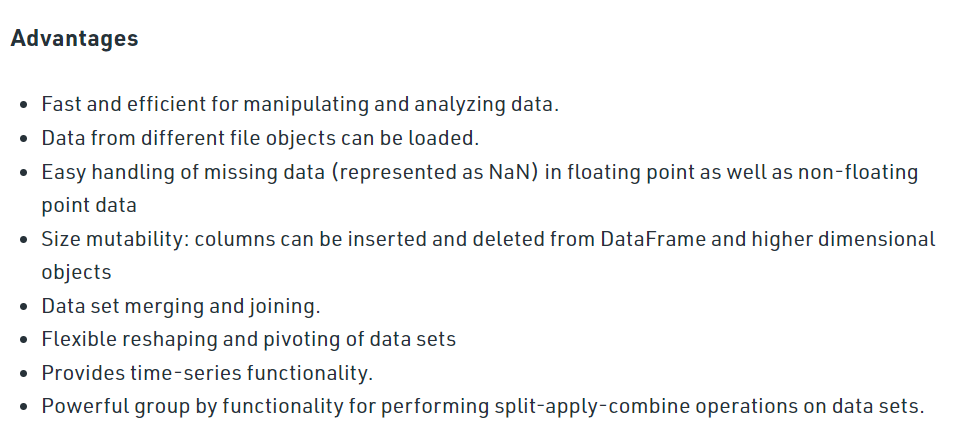

In [ ]:
import numpy as np
import pandas as pd

## The Pandas Series Object

A Pandas ``Series`` is a one-dimensional array of indexed data.
It can be created from a list or array as follows:

In [ ]:
data = pd.Series([5,14,99,888])
data

0      5
1     14
2     99
3    888
dtype: int64

In [ ]:
data[3]

888

In [ ]:
data.values

array([  5,  14,  99, 888])

In [ ]:
data.index

RangeIndex(start=0, stop=4, step=1)

Like with a NumPy array, data can be accessed by the associated index via the familiar Python square-bracket notation:

In [ ]:
data[1]

14

In [ ]:
data[1:3]

1    14
2    99
dtype: int64

### ``Series`` as generalized NumPy array

Index is the difference between numpy and pandas

In [ ]:
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=['a', 'b', 'c','d'])
data

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

And the item access works as expected:

In [ ]:
data['b']

0.5

### Series as specialized dictionary



The ``Series``-as-dictionary analogy can be made even more clear by constructing a ``Series`` object directly from a Python dictionary:

In [ ]:
student_dict = {'Ram': 123,
                   'Shyam': 124,
                   'Arun': 125}
students = pd.Series(student_dict)
students

Ram      123
Shyam    124
Arun     125
dtype: int64

By default, a ``Series`` will be created where the index is drawn from the sorted keys.
From here, typical dictionary-style item access can be performed:

In [ ]:
#To access rollno of Ram
students['Ram']

123

## The Pandas DataFrame Object

The next fundamental structure in Pandas is the ``DataFrame``.
Like the ``Series`` object discussed in the previous section, the ``DataFrame`` can be thought of either as a generalization of a NumPy array, or as a specialization of a Python dictionary.
We'll now take a look at each of these perspectives.

In [ ]:

# initialize list of lists
data = [['tom', 10], ['nick', 15], ['juli', 14]]

# Create the pandas DataFrame
df = pd.DataFrame(data, columns=['Name', 'Age'])

# print dataframe.
df

,Name,Age
0,tom,10
1,nick,15
2,juli,14


In [ ]:
df.index

RangeIndex(start=0, stop=3, step=1)

Additionally, the ``DataFrame`` has a ``columns`` attribute, which is an ``Index`` object holding the column labels:

In [ ]:
df.columns

Index(['Name', 'Age'], dtype='object')

Thus the ``DataFrame`` can be thought of as a generalization of a two-dimensional NumPy array, where both the rows and columns have a generalized index for accessing the data.

In [ ]:
df['Name']

0     tom
1    nick
2    juli
Name: Name, dtype: object

### Constructing DataFrame objects

A Pandas ``DataFrame`` can be constructed in a variety of ways.
Here we'll give several examples.

#### From a single Series object

A ``DataFrame`` is a collection of ``Series`` objects, and a single-column ``DataFrame`` can be constructed from a single ``Series``:

In [ ]:
pd.DataFrame(students, columns=['rollno'])

,rollno
Ram,123
Shyam,124
Arun,125


#### From a list of dicts

Any list of dictionaries can be made into a ``DataFrame``.


Even if some keys in the dictionary are missing, Pandas will fill them in with ``NaN`` (i.e., "not a number") values:

In [ ]:
pd.DataFrame([{'a': 1, 'b': 2}, {'b': 3, 'c': 4}])

,a,b,c
0,1.0,2,NaN
1,NaN,3,4.0


#### From a two-dimensional NumPy array

Given a two-dimensional array of data, we can create a ``DataFrame`` with any specified column and index names.
If omitted, an integer index will be used for each:

In [ ]:
np.random.rand(3, 2)

array([[0.48925761, 0.81202557],
       [0.37526746, 0.9834642 ],
       [0.10226165, 0.37402615]])

In [ ]:
pd.DataFrame(np.random.rand(3, 2),
             columns=['foo', 'bar'],
             index=['a', 'b', 'c'])

,foo,bar
a,0.965321,0.512423
b,0.969355,0.437354
c,0.196705,0.719428


#### From a NumPy structured array

We covered structured arrays in [Structured Data: NumPy's Structured Arrays](02.09-Structured-Data-NumPy.ipynb).
A Pandas ``DataFrame`` operates much like a structured array, and can be created directly from one:

In [ ]:
A = np.zeros(3, dtype=[('A', 'i8'), ('B', 'f8')])
A

array([(0, 0.), (0, 0.), (0, 0.)], dtype=[('A', '<i8'), ('B', '<f8')])

In [ ]:
pd.DataFrame(A)

,A,B
0,0,0.0
1,0,0.0
2,0,0.0


### Index as ordered set

Pandas objects are designed to facilitate operations such as joins across datasets, which depend on many aspects of set arithmetic.
The ``Index`` object follows many of the conventions used by Python's built-in ``set`` data structure, so that unions, intersections, differences, and other combinations can be computed in a familiar way:

In [ ]:
indA = pd.Index([1, 3, 5, 7, 9])
indB = pd.Index([2, 3, 5, 7, 11])

In [ ]:
indA & indB  # intersection- common elements

<ipython-input-71-b0dd807d5915>:1: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  indA & indB  # intersection- common elements


Int64Index([3, 5, 7], dtype='int64')

In [ ]:
indA | indB  # union - all elements

<ipython-input-72-425ebdaa0b7c>:1: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  indA | indB  # union - all elements


Int64Index([1, 2, 3, 5, 7, 9, 11], dtype='int64')

In [ ]:
indA ^ indB  # symmetric difference

<ipython-input-73-3b8ccf9eb8f2>:1: FutureWarning: Index.__xor__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__xor__.  Use index.symmetric_difference(other) instead
  indA ^ indB  # symmetric difference


Int64Index([1, 2, 9, 11], dtype='int64')

DATA INDEXING AND SELECTION

In [ ]:
import pandas as pd
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=['a', 'b', 'c', 'd'])
data

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

In [ ]:
# masking
data[(data ==0.5) ]

b    0.5
dtype: float64

In [ ]:
# fancy indexing
data[['a', 'd']]

a    0.25
d    1.00
dtype: float64

Indexers: loc, iloc, and ix

In [ ]:
data = pd.Series(['a', 'b', 'c'], index=[1, 3, 5])
data

1    a
3    b
5    c
dtype: object

In [ ]:
# explicit index when indexing - user defined index
data[1]

'a'

In [ ]:
# implicit index when slicing
data[1:3]

3    b
5    c
dtype: object

Because of this potential confusion in the case of integer indexes, Pandas provides some special indexer attributes that explicitly expose certain indexing schemes.

First, the loc attribute allows indexing and slicing that always references the explicit index:

In [ ]:
data.loc[1] #Local means explicit

'a'

In [ ]:
data.loc[1:3]

1    a
3    b
dtype: object

The iloc attribute allows indexing and slicing that always references the implicit Python-style index:

In [ ]:
data.iloc[1:3] #Implicit

3    b
5    c
dtype: object

In [ ]:
student= [['Ram', 123,80,85], ['Shyam', 124,70,75],
                  ['Arun', 125,35,60], ['Gopal', 235,95,70]]
data = pd.DataFrame(student,columns=['Name','Rollno',"FDS_Mark","DS_Mark"])

In [ ]:
data

,Name,Rollno,FDS_Mark,DS_Mark
0,Ram,123,80,85
1,Shyam,124,70,75
2,Arun,125,35,60
3,Gopal,235,95,70


In [ ]:
#Select all roll numbers
data['Rollno']

0    123
1    124
2    125
3    235
Name: Rollno, dtype: int64

In [ ]:
data['name_dept'] = data['Name'] + "_ECE"
data

,Name,Rollno,FDS_Mark,DS_Mark,name_dept
0,Ram,123,80,85,Ram_ECE
1,Shyam,124,70,75,Shyam_ECE
2,Arun,125,35,60,Arun_ECE
3,Gopal,235,95,70,Gopal_ECE


In [ ]:
#Select first two rows
data[:2]

,Name,Rollno,FDS_Mark,DS_Mark,name_dept
0,Ram,123,80,85,Ram_ECE
1,Shyam,124,70,75,Shyam_ECE


In [ ]:
#Operating on Pandas Data
#Dividing mark column by 100
data['FDS_Mark']/100


0    0.80
1    0.70
2    0.35
3    0.95
Name: FDS_Mark, dtype: float64

In [ ]:
data['DS_Mark']-15

0    70
1    60
2    45
3    55
Name: DS_Mark, dtype: int64

In [ ]:
data['Total_mark']=data['FDS_Mark']+data['DS_Mark']

In [ ]:
data

,Name,Rollno,FDS_Mark,DS_Mark,name_dept,Total_mark
0,Ram,123,80,85,Ram_ECE,165
1,Shyam,124,70,75,Shyam_ECE,145
2,Arun,125,35,60,Arun_ECE,95
3,Gopal,235,95,70,Gopal_ECE,165


In [ ]:
data['Total_mark'].mean()

142.5

In [ ]:
data['Total_mark'].median()

155.0

In [ ]:
data['Total_mark'].mode()

0    165
dtype: int64

In [ ]:
#Handling Missing Data

isnull(): Generate a boolean mask indicating missing values

---


notnull(): Opposite of isnull()

---


dropna(): Return a filtered version of the data

---


fillna(): Return a copy of the data with missing values filled or imputed

In [ ]:
import numpy as np
data = pd.Series([1, np.nan, 'hello', None])
data

0        1
1      NaN
2    hello
3     None
dtype: object

In [ ]:
data.isnull()

0    False
1     True
2    False
3     True
dtype: bool

In [ ]:
data.dropna() # Inplace changes original copy

0        1
2    hello
dtype: object

In [ ]:
data

0        1
1      NaN
2    hello
3     None
dtype: object

In [ ]:
#Filling Null Values
data.fillna(0)

0        1
1        0
2    hello
3        0
dtype: object

In [ ]:
# forward-fill
data.fillna(method='ffill')

0        1
1        1
2    hello
3    hello
dtype: object